<a href="https://colab.research.google.com/github/mkandaleft/COMP432-GroupM/blob/main/Comp432_TimedEpochs%26FLOPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
pip install thop

In [40]:
# Basic includes.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics
import torch
import torchvision
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from thop import profile

# Do we need pandas, etc.?

# Use the GPU if available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Task 1

In [41]:
# Task specific includes.
import zipfile

# Download and unzip the first dataset.
!gdown 1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt # Roxane: I put the dataset on my Drive for ease of downloading.

with zipfile.ZipFile("/content/Dataset1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

data_path = "/content/Colorectal Cancer_"

Downloading...
From: https://drive.google.com/uc?id=1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt
To: /content/Dataset1.zip
100% 814M/814M [00:05<00:00, 155MB/s]


In [42]:
# Load the data to a torch tensor.

# Code partly provided by the outline for assignment 1.
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Data normalization done here.
dataset = torchvision.datasets.ImageFolder(data_path, transforms) # Load the images and their labels into a tensor.

train_set, test_set = torch.utils.data.random_split(dataset, [0.7,0.3]) # Split the dataset into training and testing set.

batch_size = 100 # What batch size do we want?
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=batch_size)#, num_workers=2) # Create train loader. The multiple workers were being a fuck :/
test_loader = torch.utils.data.DataLoader(test_set, shuffle=True)#, num_workers=2) # Create test loader.

torch.Size([3, 224, 224]) 0


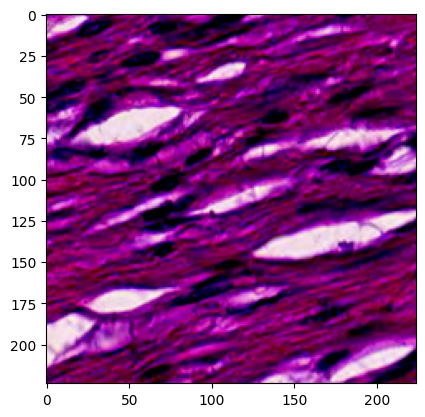

In [43]:
# Look at a random sample from the normalized training set.
index = random.randint(0, len(train_set))
image, label = train_set[index]
plt.imshow(image.numpy().transpose(1, 2, 0))
print(image.shape, label)

# Instead, print the same image before and after loading in the dataset?

# Preprocess the data.
# Do we need to do data augmentation?

In [44]:
## Declare the model
# https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html

resnet18 = torchvision.models.resnet18() # Do we need any special parameters?
resnet18 = resnet18.to(device)

In [45]:
# Train the model with the dataset.

learning_rate = 0.0025
num_epoch = 20

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(resnet18.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 0.001) # Customize other params?
#optimizer = torch.optim.Adam(resnet18.parameters(), lr = learning_rate) # Should we use adam instead of SGD? It didn't give good results when I tried.

total_training_time = 0

next_epoch = 1
for epoch in range(next_epoch, next_epoch+num_epoch):
    resnet18.train()

    # Measure the time taken by each epoch.
    # Record the start time.
    start_time = time.time()

    for i, batch in enumerate(train_loader, 0):
        X, y = batch

        X = X.to(device)
        y = y.to(device)

        y_pred = resnet18(X)
        loss = loss_function(y_pred, y)

        resnet18.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the end time.
    end_time = time.time()
    epoch_duration = end_time - start_time
    total_training_time += epoch_duration

    print("Epoch %2d: loss on final training batch: %.4f.\nThis epoch lasted %.4f seconds." % (epoch, loss.item(), epoch_duration))

next_epoch = epoch+1

average_epoch_duration = total_training_time/num_epoch
print("\nThe average duration of an epoch has been {} seconds.".format(average_epoch_duration))

Epoch  1: loss on final training batch: 0.3779.
This epoch lasted 17.2561 seconds.
Epoch  2: loss on final training batch: 0.3202.
This epoch lasted 16.2247 seconds.
Epoch  3: loss on final training batch: 0.1704.
This epoch lasted 11.7374 seconds.
Epoch  4: loss on final training batch: 0.1287.
This epoch lasted 11.8638 seconds.
Epoch  5: loss on final training batch: 0.1606.
This epoch lasted 11.9788 seconds.
Epoch  6: loss on final training batch: 0.0978.
This epoch lasted 12.0820 seconds.
Epoch  7: loss on final training batch: 0.1031.
This epoch lasted 12.0368 seconds.
Epoch  8: loss on final training batch: 0.0538.
This epoch lasted 12.1496 seconds.
Epoch  9: loss on final training batch: 0.0913.
This epoch lasted 12.3170 seconds.
Epoch 10: loss on final training batch: 0.0790.
This epoch lasted 12.3845 seconds.
Epoch 11: loss on final training batch: 0.1458.
This epoch lasted 13.8890 seconds.
Epoch 12: loss on final training batch: 0.0403.
This epoch lasted 12.3720 seconds.
Epoc

In [46]:
# Save / Export the model and its weights.

torch.save(resnet18, "resnet18_model.pth")
torch.save(resnet18.state_dict(), "resnet18_weights.pth")

In [47]:
# Load the pre-trained moved.

checkpoint =  torch.load("/content/resnet18_weights.pth")

resnet18.load_state_dict(checkpoint)

<All keys matched successfully>


The average duration of an inference batch has been 0.00424258481888544 seconds.
The total inference time was 0.17818856239318848 seconds.

42
Classification report for the training set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1400
           1       1.00      1.00      1.00      1399
           2       0.93      1.00      0.96      1401

    accuracy                           0.97      4200
   macro avg       0.98      0.97      0.97      4200
weighted avg       0.98      0.97      0.97      4200



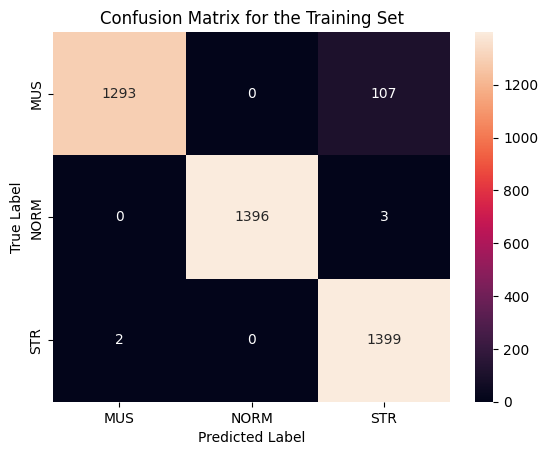


The average duration of an inference batch has been 0.0033606419298383926 seconds.
The total inference time was 6.0491554737091064 seconds.

1800

Classification report for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       600
           1       0.99      0.98      0.99       601
           2       0.90      0.98      0.94       599

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800



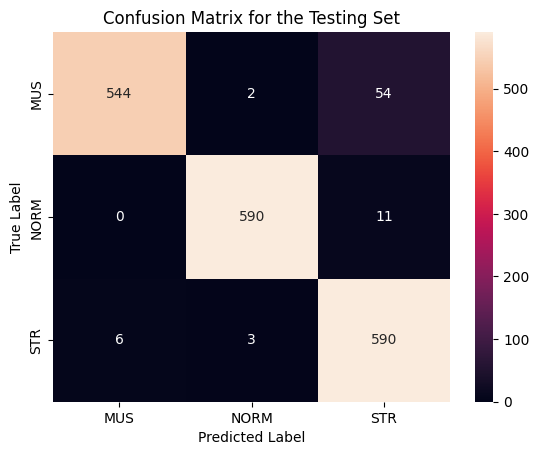

In [48]:
# Testing time!

# Roxane: I mostly copied the work I'd done for my assignment 1, so we'll likely need to modify this, have it print more info, etc.

resnet18.eval()

# Test and report on the training data.
y_train_true = []
y_train_pred = []

total_inference_duration = 0
total_inference_count = 0

for data in train_loader:
  train_inputs, train_labels = data
  train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
  y_train_true.extend(train_labels.tolist())

  start_time = time.time()
  output = resnet18(train_inputs)
  end_time = time.time()

  batch_duration = end_time - start_time
  total_inference_duration += batch_duration
  total_inference_count += 1

  output = torch.softmax(output, dim=1)
  y_train_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

average_batch_duration = total_inference_duration / total_inference_count
print("\nThe average duration of an inference batch has been {} seconds.\nThe total inference time was {} seconds.\n".format(average_batch_duration, total_inference_duration))
print(total_inference_count)

class_report_train = sklearn.metrics.classification_report(y_train_true, y_train_pred)
print("Classification report for the training set:")
print(class_report_train)

#print("\nConfusion matrix for the training set:\nMUS, NORM, STR")
#print(sklearn.metrics.confusion_matrix(y_train_true, y_train_pred))

# Display the confusion matrix as a fancy picture.
class_labels = ["MUS", "NORM", "STR"]
cm_train = sklearn.metrics.confusion_matrix(y_train_true, y_train_pred)

sns.heatmap(cm_train, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for the Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Test and report on the testing data.
y_test_true = []
y_test_pred = []

total_inference_duration_test = 0
total_inference_count_test = 0

for data in test_loader:
  test_inputs, test_labels = data
  test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
  y_test_true.extend(test_labels.tolist())

  start_time = time.time()
  output = resnet18(test_inputs)
  end_time = time.time()

  batch_duration = end_time - start_time

  total_inference_duration_test = total_inference_duration_test + batch_duration
  total_inference_count_test += 1

  output = torch.softmax(output, dim=1)
  y_test_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

average_batch_duration_test = total_inference_duration_test / total_inference_count_test
print("\nThe average duration of an inference batch has been {} seconds.\nThe total inference time was {} seconds.\n".format(average_batch_duration_test, total_inference_duration_test))
print(total_inference_count_test)

class_report_test = sklearn.metrics.classification_report(y_test_true, y_test_pred)
print("\nClassification report for the testing set:")
print(class_report_test)
#print("\nConfusion matrix for the testing set:\nMUS, NORM, STR")
#print(sklearn.metrics.confusion_matrix(y_test_true, y_test_pred))

# Display the confusion matrix as a fancy picture.
cm_test = sklearn.metrics.confusion_matrix(y_test_true, y_test_pred)

sns.heatmap(cm_test, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for the Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
# Profile the FLOPs for the training data

# Prepare an example batch.
FLOPS_batch = next(iter(train_loader))
FLOPS_batch_input = FLOPS_batch[0]
print(FLOPS_batch_input.shape)

resnet18.eval()
resnet18 = resnet18.to(device)
FLOPS_batch_input = FLOPS_batch_input.to(device)

# Profilw the model
flops, params = profile(resnet18, inputs=(FLOPS_batch_input,))
print(f"FLOPs: {flops / 1e9} Billion")
print(f"Parameters: {params / 1e6} Million")

torch.Size([100, 3, 224, 224])
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs: 182.4033792 Billion
Parameters: 11.689512 Million


In [50]:
from sklearn.manifold import TSNE

resnet18.eval()

# Store features and labels
features_list = []
labels_list = []

# Get the features and labels
for data in train_loader:
    train_inputs, train_labels = data
    train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
    features = resnet18(train_inputs).detach().cpu().numpy()
    features_list.append(features)
    labels_list.append(train_labels.cpu().numpy())

# Concatenate features and labels
features = torch.from_numpy(np.concatenate(features_list))
labels = torch.from_numpy(np.concatenate(labels_list))

# Reshape the features tensor if needed
features = features.view(features.size(0), -1)  # Reshape if necessary for t-SNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features = tsne.fit_transform(features)

# Verbal class labels.
class_labels =["Smooth Muscle", "Normal Colon Mucosa", "Cancer-Associated Stroma"]

# Plot the t-SNE embedded features with class labels
plt.figure(figsize=(10, 8))
for class_idx in range(3):
    plt.scatter(
        embedded_features[labels == class_idx, 0],
        embedded_features[labels == class_idx, 1],
        label=class_labels[ class_idx],
    ) # How to switch the labels to "mus", "norm" and "str"?
plt.title('t-SNE Visualization of ResNet-18 Features')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

# Task 2

### Analyze and visualize feature extraction done by pre-trained CNN encoder from Task 1 when applied to Dataset 2 and Dataset 3

#### Dataset 2

In [ ]:
# Create a folder 'content' in root and add Dataset 2 and Dataset 3 folders

# Download Dataset 2
data_path_2 = 'content/Dataset 2/Prostate Cancer'
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset_2 = torchvision.datasets.ImageFolder(data_path_2, transforms)

batch_size = 100
data_loader_2 = torch.utils.data.DataLoader(dataset_2, shuffle=True, batch_size=batch_size)

In [ ]:
# Visualize a random sample from the normalized dataset
index = random.randint(0, len(dataset_2))
image, label = dataset_2[index]
plt.imshow(image.numpy().transpose(1, 2, 0))
print(image.shape, label)

In [ ]:
# Load the pre-trained ResNet-18 CNN model trained in Task 1
checkpoint =  torch.load("resnet18_weights.pth", map_location=torch.device('cpu'))
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.load_state_dict(checkpoint)

In [ ]:
from sklearn.manifold import TSNE

resnet18.eval()

# Store features and labels
features_list = []
labels_list = []

# Get the features and labels
for data in data_loader_2:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    features = resnet18(inputs).detach().cpu().numpy()
    features_list.append(features)
    labels_list.append(labels.cpu().numpy())

# Concatenate features and labels
features = torch.from_numpy(np.concatenate(features_list))
labels = torch.from_numpy(np.concatenate(labels_list))

# Save the features and labels for learning tasks
np.save('extracted_features.npy', features.numpy())
np.save('labels.npy', labels.numpy())

# Reshape the features tensor if needed
features = features.view(features.size(0), -1)  # Reshape if necessary for t-SNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features = tsne.fit_transform(features)

# Verbal class labels.
class_labels = ["Prostate Cancer Tumor Tissue", "Benign Glandular Prostate Tissue", "Benign Non-Glandular Prostate Tissue"]

# Plot the t-SNE embedded features with class labels
plt.figure(figsize=(10, 8))
for class_idx in range(3):
    plt.scatter(
        embedded_features[labels == class_idx, 0],
        embedded_features[labels == class_idx, 1],
        label=class_labels[ class_idx],
    )
plt.title('t-SNE Visualization of ResNet-18 Features')
plt.legend()
plt.show()

#### Dataset 3

In [ ]:
# Download Dataset 3
data_path_3 = 'content/Dataset 3/Animal Faces'
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset_3 = torchvision.datasets.ImageFolder(data_path_3, transforms)

batch_size = 100
data_loader_3 = torch.utils.data.DataLoader(dataset_3, shuffle=True, batch_size=batch_size)

In [ ]:
# Visualize a random sample from the normalized dataset
index = random.randint(0, len(dataset_3))
image, label = dataset_3[index]
plt.imshow(image.numpy().transpose(1, 2, 0))
print(image.shape, label)

In [ ]:
from sklearn.manifold import TSNE

resnet18.eval()

# Store features and labels
features_list = []
labels_list = []

# Get the features and labels
for data in data_loader_3:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    features = resnet18(inputs).detach().cpu().numpy()
    features_list.append(features)
    labels_list.append(labels.cpu().numpy())

# Concatenate features and labels
features = torch.from_numpy(np.concatenate(features_list))
labels = torch.from_numpy(np.concatenate(labels_list))

# Reshape the features tensor if needed
features = features.view(features.size(0), -1)  # Reshape if necessary for t-SNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features = tsne.fit_transform(features)

# Verbal class labels.
class_labels = ["Cats", "Dogs", "Wildlife Animals"]

# Plot the t-SNE embedded features with class labels
plt.figure(figsize=(10, 8))
for class_idx in range(3):
    plt.scatter(
        embedded_features[labels == class_idx, 0],
        embedded_features[labels == class_idx, 1],
        label=class_labels[ class_idx],
    )
plt.title('t-SNE Visualization of ResNet-18 Features')
plt.legend()
plt.show()

Supervised learning Technique (SVM) on Dataset 2 of our Trained Resnet-18 model

In [ ]:
from sklearn.svm import SVC

# Load the features and labels
features = np.load('extracted_features.npy')
labels = np.load('labels.npy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)